# 1. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

# 2. Collecting the data

In [2]:
url_train = "https://raw.githubusercontent.com/minsuk-heo/kaggle-titanic/master/input/train.csv"

train = pd.read_csv(url_train)

In [3]:
url_test = "https://raw.githubusercontent.com/minsuk-heo/kaggle-titanic/master/input/test.csv"

test = pd.read_csv(url_test)

# 3. Exploratory data analysis

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### Data Dictionary

- Survived: 0 = No; 1 = Yes
- pclass (Ticket class): 1 = 1st; 2 = 2nd; 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked (Port of Embarkation): C = Cherbourg; Q = Queenstown; S = Southampton

In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### train information
- There are 891 rows and 12 columns;
- We can see some _missing values_ in **train** dataset: `Age`, `Cabin`, and `Embarked`

In [9]:
test.shape

(418, 11)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### test information
- There are 418 rows and 11 columns
- Test has no target column, which is 'Survived'
- We can see some _missing values_ in **test** dataset: `Age`, `Fare`, and `Cabin`

# 4. Visualization

### Bar chart for categorical features

convert this graph to compare in a proporcional way. Like the percentagem of people who survived or not. Because, we don't know if there are more women, more 3rd class people and so on.

In [12]:
def bar_chart(feature):
    
    '''a bar chart to analyse how many people survided or not 
    given a feature'''
    
    # the qty of people (survived) for each feature value
    survived = train[train.Survived==1][feature].value_counts()
    dead = train[train.Survived==0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    
    df.plot(kind='bar', stacked=True, figsize=(10,5))

#### Sex

In [ ]:
bar_chart('Sex')

- Most of survived people was women.
- Survived more women that man. 
- Dead more man than women.

#### Pclass

In [ ]:
bar_chart('Pclass')

- The 1st and 3rd class people more survived than 2 class.
- The 3rd class people more dead than other classes.

**Observation** <br>
The 3rd class is significantily present in both groups. Is it because the quantity of people? <br>
Peharps it would be better to make this graph proportionally -- like: what percentage of first class survivors?

#### SibSp

In [ ]:
bar_chart('SibSp')

#### Parch

In [ ]:
bar_chart('Parch')

#### Embarked

In [ ]:
bar_chart('Embarked')

# 5. Feature Engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself ([wikipedia](https://en.wikipedia.org/wiki/Feature_engineering)). <br>
Algorithms in machine learning require a numerical representation of objects, because it facilitates the processing and statistical analysis. <br>
<br>
<br>
Examples <br>
- Derive new features using existing features
- Remove irrelevant features (Feature Selection)
- Transform existing features
- Encoding categorical variables (Feature Encoding)

In [13]:
all_data = [train, test]

### 5.1 Name (Mr, Miss, Mrs)

In [14]:
for dataset in all_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [15]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Lady          1
Don           1
Mme           1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

In [16]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

- As we see most of people are treated like `Mr`, `Miss` or `Mrs`.  So let's categorize them with numerical values...

### Converting Title to a numerical variable (categorical nominal)

**Title map** <br>
Mr : 0 <br>
Miss : 1 <br>
Mrs : 2 <br>
Others : 3

In [17]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in all_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [18]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [19]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2


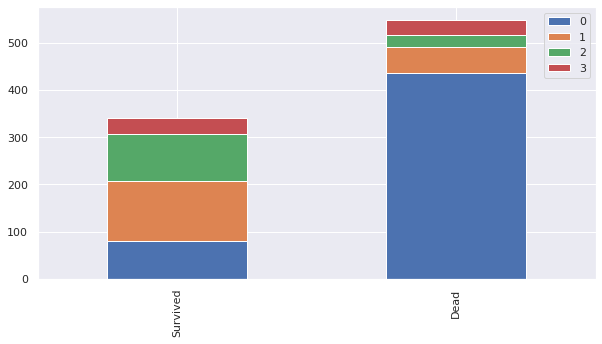

In [20]:
bar_chart('Title')

### Removing name feature
they are no longer needed, because the title is more important

In [21]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [22]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [23]:
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2


## 5.2 Sex

### Converting Sex to a numerical variable (categorical nominal)

**Sex map** <br>
male: 0 <br>
female: 1

In [24]:
sex_mapping = {'male': 0, "female": 1}

for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

## 5.3 Age

### Handle with missing values

Decision: filling missing age with median age for each tittle (Mr, Mrs, Miss, Others)

In [25]:
train[['Age']].head(10)

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [26]:
train.groupby('Title')['Age'].transform('median').head(10)

0    30.0
1    35.0
2    21.0
3    35.0
4    30.0
5    30.0
6    30.0
7     9.0
8    35.0
9    35.0
Name: Age, dtype: float64

In [27]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

In [28]:
train[['Age']].head(6)

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,30.0


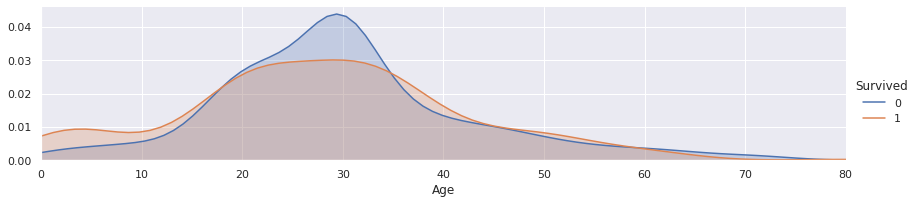

In [29]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


### Converting Age to a numerical variable (categorical ordinal)

**Age map** <br>
child: 0 <br>
young: 1 <br>
adult: 2 <br>
mid-age: 3 <br>
senior: 4 <br>

In [32]:
for dataset in all_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [33]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2


In [34]:
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2


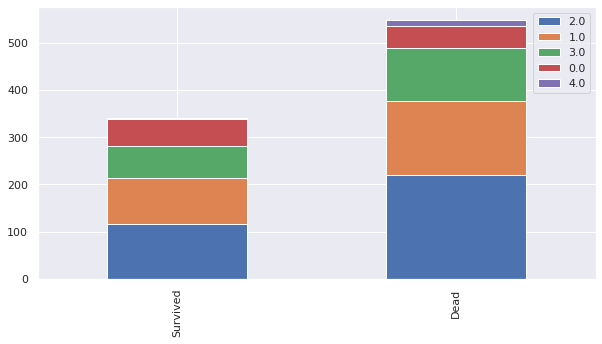

In [35]:
bar_chart('Age')

## 5.4 Embarked

### Handle with missing values

Decision: after see the most common class is 'S', filling missing embarked values with 'S'.

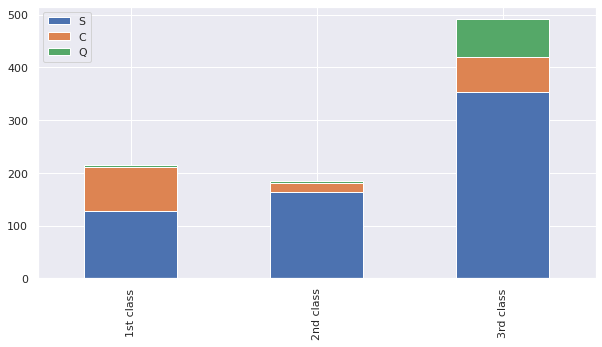

In [36]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])

df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [37]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

### Converting Embarked to a numerical variable (categorical nominal)

**embarked map** <br>
S = 0 <br>
C = 1 <br>
Q = 2

In [38]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}

for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [39]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2


## 5.5 Fare

### Handle with missing values

Decision: filling missing Fare with the median Fare for each pclass.

In [40]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [41]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2


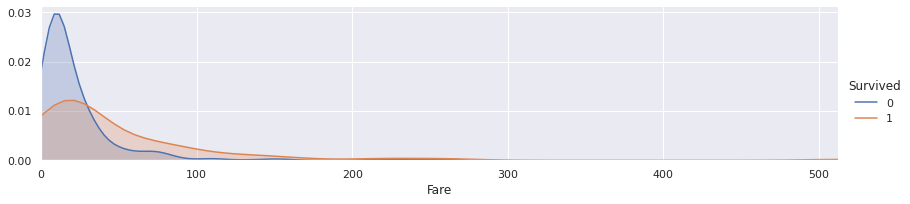

In [42]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

### Converting Fare to numerical variable (categorical ordinal)

In [43]:
for dataset in all_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


## 5.6 Cabin

Understading the distribution

In [45]:
train.Cabin.value_counts().head()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
F2             3
Name: Cabin, dtype: int64

### Converting Cabin value to numerical values (categorical nominal)

Decision: use just the first Cabin letter.

In [46]:
for dataset in all_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

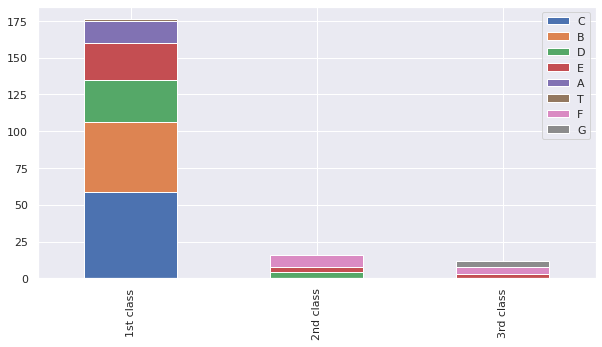

In [47]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])

df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [48]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

for dataset in all_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

### Handle with missing values

Decision: filling missing Cabin with the median Cabin for each pclass.

In [49]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


## 5.7 Family Size

New feature

In [51]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

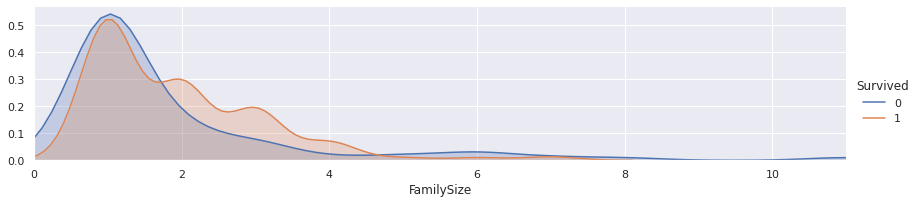

In [52]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

### Categorizing the Family feature (categorical ordinal)

In [53]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}

for dataset in all_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [54]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4


In [55]:
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2,0.4


## 5.8 Removing unnecessary features

In [56]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

## 5.9 Creating train_data, test_data, and target dataframes

In [57]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [58]:
train_data.head(2)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4


In [59]:
target.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [60]:
test_data = test.drop('PassengerId', axis=1).copy()

In [61]:
test_data.head(2)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,0.0
1,3,1,3.0,0.0,2.0,0,2,0.4


# 6. Modeling

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import auc, roc_curve, precision_recall_curve

import numpy as np

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   Title       891 non-null    int64  
 7   FamilySize  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [82]:
def area_under_curve_graph (clf, train_data, target):
    
    y_pred_prob = cross_val_predict(clf, train_data, target, cv=k_fold, n_jobs=1, method='predict_proba')
    
    # TPR = Recall = TP / (TP + FN)
    # FPR = FP / (FP + TN)

    false_positive_rate, true_positive_rate, threshold = roc_curve(target, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.figure(figsize = (8,8))
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(false_positive_rate, true_positive_rate, color = 'green', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [92]:
def prediction_recall_curve_graph (clf, train_data, target):

    y_pred_prob = cross_val_predict(clf, train_data, target, cv=k_fold, n_jobs=1, method='predict_proba')
    
    # Recall = TP / (TP + FN) What proportion of actual positives was identified correctly?
    # Precision = TP / (TP + FP) What proportion of positive identifications was actually correct?
    
    precision, recall, thresholds = precision_recall_curve(target, y_pred_prob[:,1])
    pr_aucRF = auc(recall, precision)
    plt.figure(figsize = (8,8))
    plt.title('Precision Recall Curve')
    plt.plot(recall, precision, color = 'red', label = 'PR AUC = %0.2f' % pr_aucRF)
    plt.legend(loc = 'lower right')

    # no_skill = Count of P / Total count
    no_skill = len(target[target==1]) / len(target)
    plt.plot([0, 1],  [no_skill, no_skill], linestyle = '--')

    # Get best threshold
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    print('\n')
    plt.plot(recall[ix], precision[ix], marker='o', color='black', label='Best')

    plt.axis('tight')
    plt.ylabel('Precision')
    plt.xlabel('Recall')

## 6.1 Cross Validation (k-fold)

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [66]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 6.2 KNN

In [67]:
clf_knn = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf_knn, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [68]:
round(np.mean(score)*100,2)

82.6

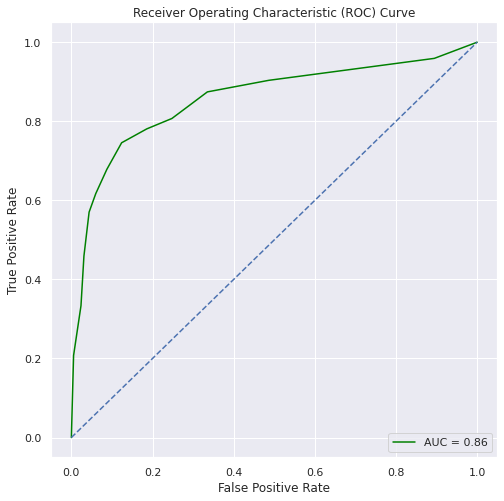

In [83]:
area_under_curve_graph(clf_knn, train_data, target)

Best Threshold=0.538462, F-Score=0.767




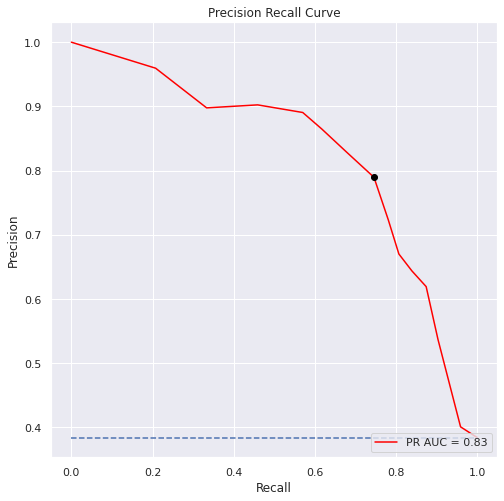

In [93]:
prediction_recall_curve_graph(clf_knn, train_data, target)

## 6.3 Decision tree

In [70]:
clf_dt = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf_dt, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.82022472 0.7752809  0.7752809  0.88764045 0.76404494
 0.84269663 0.82022472 0.74157303 0.79775281]


In [71]:
round(np.mean(score)*100,2)

79.91

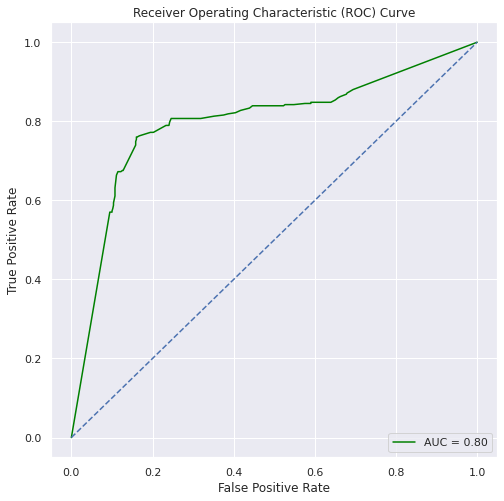

In [84]:
area_under_curve_graph(clf_dt, train_data, target)

Best Threshold=0.437500, F-Score=0.749




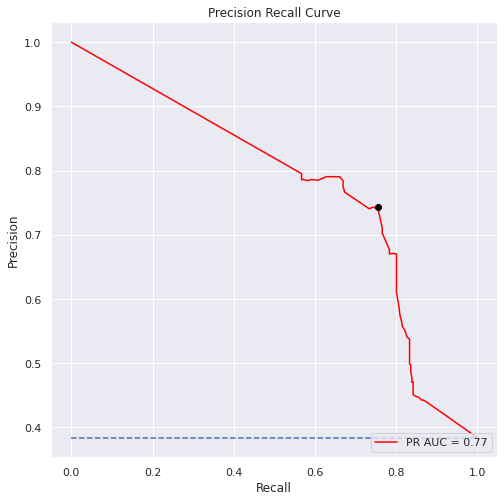

In [94]:
prediction_recall_curve_graph(clf_dt, train_data, target)

## 6.4 Random Forest

In [73]:
clf_rf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf_rf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.82022472 0.80898876 0.78651685 0.87640449 0.80898876
 0.83146067 0.80898876 0.78651685 0.80898876]


In [74]:
round(np.mean(score)*100,2)

81.26

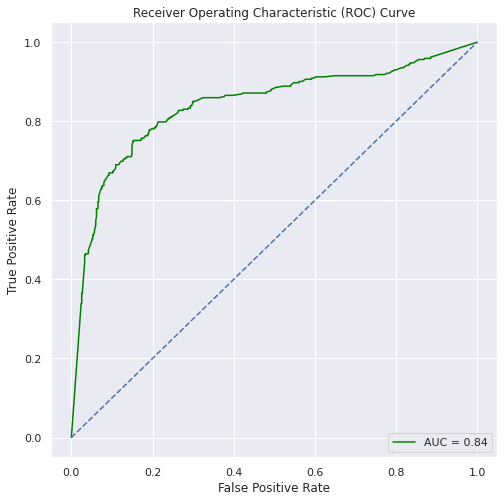

In [85]:
area_under_curve_graph(clf_rf, train_data, target)

Best Threshold=0.384615, F-Score=0.746




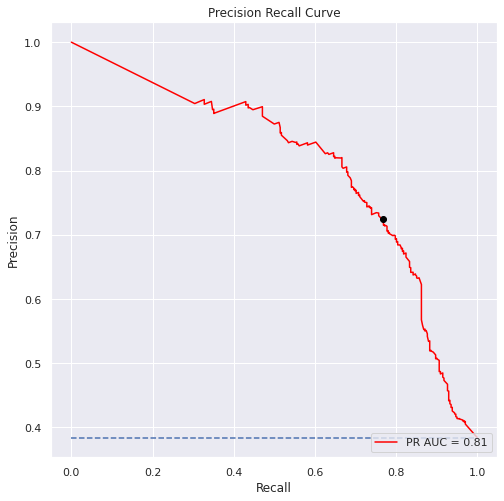

In [95]:
prediction_recall_curve_graph(clf_rf, train_data, target)

## 6.5 Naive Bayes

In [76]:
clf_gnb = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf_gnb, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [77]:
round(np.mean(score)*100, 2)

78.78

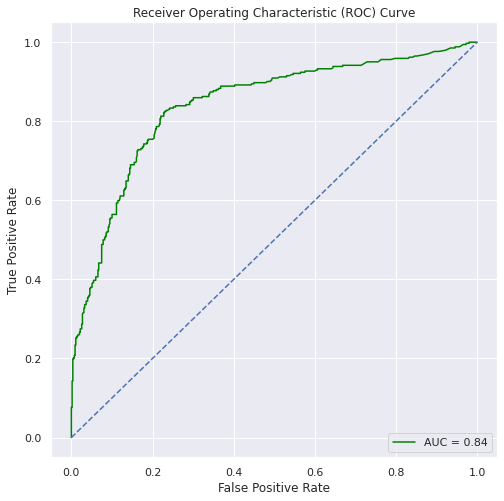

In [86]:
area_under_curve_graph(clf_gnb, train_data, target)

Best Threshold=0.519806, F-Score=0.752




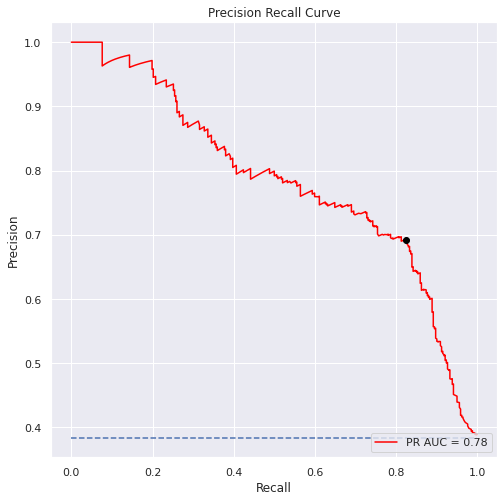

In [96]:
prediction_recall_curve_graph(clf_gnb, train_data, target)

## 6.6 SVM

In [79]:
clf_svm = SVC(gamma='scale')
scoring = 'accuracy'
score = cross_val_score(clf_svm, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [80]:
round(np.mean(score)*100,2)

83.5

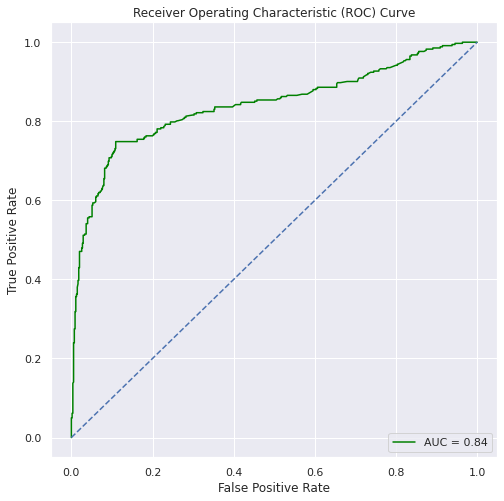

In [87]:
clf_svm_t = SVC(gamma='scale', probability=True)
area_under_curve_graph(clf_svm_t, train_data, target)

Best Threshold=0.481138, F-Score=0.778




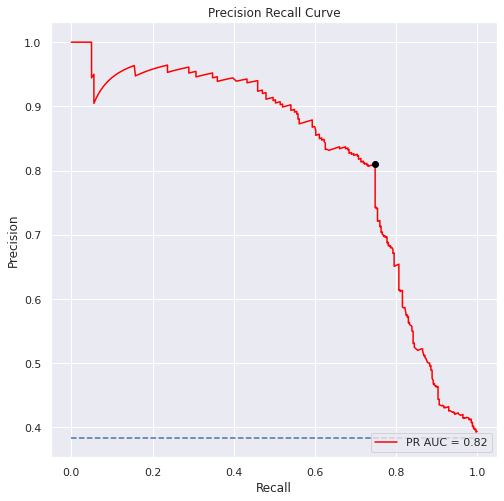

In [98]:
prediction_recall_curve_graph(clf_svm_t, train_data, target)

# 7. Applying the best algorithm SVM or KNN

for this case SVM was the algorithm with the best accuracy
and KNN have the best AUC

In [ ]:
clf = SVC(gamma='scale')
clf.fit(train_data, target)

prediction = clf.predict(test_data)

In [ ]:
## Kaggle challenge ask for passengerID and Survived

result = pd.DataFrame({'PassengerId': test['PassengerId'],
                      'Survived': prediction})

result.head()